In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [3]:
X = np.array([ [0,0], [0,1], [1,0], [1,1] ])
Y = np.array([ [0], [1], [1], [0]])

In [4]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        hiddenLayerNeurons_2 = 10
        outLayerNeurons = 1
        self.learning_rate = 0.01
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_H2H = np.random.randn(hiddenLayerNeurons, hiddenLayerNeurons_2)
        self.W_OH2 = np.random.randn(hiddenLayerNeurons_2, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):

        hidden_input_1 = np.dot(X, self.W_HI)
        self.hidden_output_1 = self.sigmoid(hidden_input_1)

        Hidden2_input = np.dot(self.hidden_output_1, self.W_H2H)
        self.hidden_output_2 = self.sigmoid(Hidden2_input)

        output_input = np.dot(self.hidden_output_2, self.W_OH2)
        pred = self.sigmoid(output_input)

        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = output_error * self.sigmoid(pred, der=True)

        hidden2_error = output_delta.dot(self.W_OH2.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden_output_2, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden_output_1, der=True)

        self.W_OH2 += self.hidden_output_2.T.dot(output_delta)
        self.W_H2H += self.hidden_output_1.T.dot(hidden2_delta)
        self.W_HI += X.T.dot(hidden1_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)


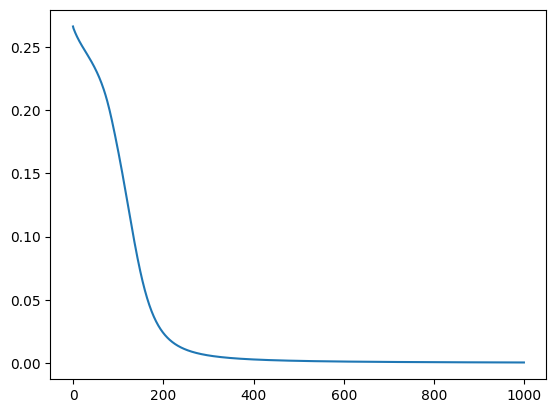

In [5]:
nn = NeuralNetwork()
err = []
for i in range(1000):
    nn.train(X,Y)
    err.append(np.mean(np.square(Y-nn.feedForward(X))))
    
plt.plot(err)

In [6]:
nn.feedForward([0,0])

array([0.02000792])